In [25]:
import numpy as np
import matplotlib.pyplot as plt
import receiving_operating_characteristic as roc
from sklearn import metrics
import collections
import random
import os

def intersect(a, b):
    return list(set(a) & set(b))

INFO_FIELDS = ['stat', 'causality']
class LocusResult(collections.namedtuple('_LocusResult', INFO_FIELDS)):
    __slots__ = ()

nloci = 200
nsim = 10
startsim = 1

In [26]:
#basedir = '/mnt/storage/saikat/work/multivariate-gwas-bayesian-logistic-regression/quasi_laplace_gwas/results/meta_nold'
basedir = '/scratch/sbanerj/quasi_laplace_gwas/simulated_phenotype/meta_nold'

locusfile = os.path.join(basedir, 'LOCUSNAMES')
with open(locusfile, 'r') as mfile:
    locusprefixes = mfile.readlines()
locusprefixes = [x.strip() for x in locusprefixes]

In [ ]:
blore = list()
blore_feat = list()
snptest = list()


for sim in range(startsim, startsim + nsim):
    
    simdir = os.path.join( basedir, 'simulations', 'sim{:03d}'.format(sim + 1) )
    causal_file = os.path.join( simdir, 'samples/causal.snplist' )

    causal_loci = list()
    with open(causal_file, 'r') as mfile:
        for mline in mfile:
            if mline.startswith('Locus'):
                mline_split = mline.split()
                causal_loci.append(int(mline_split[3]))

    # B-LORE
    for l, locus in enumerate(locusprefixes):
        path = 'blore/meta_without_feature/zmax4_mu0_pi0.01_sig0.01/blore_meta_res/{:s}.gen.res'
        outfile = os.path.join( simdir, path.format(locus) )
        with open(outfile, 'r') as mfile:
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[2])
        causality = causal_loci[l]
        mres = LocusResult(stat = prob, causality = causality)
        blore.append(mres)
        
    # B-LORE with functional annotations
    for l, locus in enumerate(locusprefixes):
        path = 'blore/meta_with_feature/zmax4_mu0_pi0.01_sig0.01/blore_meta_res/{:s}.gen.res'
        outfile = os.path.join( simdir, path.format(locus) )
        with open(outfile, 'r') as mfile:
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[2])
        causality = causal_loci[l]
        mres = LocusResult(stat = prob, causality = causality)
        blore_feat.append(mres)
        
    # PVALUES
    for l, locus in enumerate(locusprefixes):
        path = 'snptest/meta/{:s}.meta.out'
        resfile = os.path.join( simdir, path.format(locus) )
        problist = list()
        with open(resfile, 'r') as mfile:
            for mline in mfile:
                #if not mline.startswith('#') and not mline.startswith('alternate_ids'):
                if not mline.startswith('#') and not mline.startswith('chr'):
                    mlinesplit = mline.split()
                    rsid = mlinesplit[1]
                    pval = float(mlinesplit[5])
                    problist.append(-np.log10(pval))
        prob = max(problist)
        causality = causal_loci[l]
        mres = LocusResult(stat = prob, causality = causality)
        snptest.append(mres)

In [27]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


blore = list()
blore_feat = list()
snptest = list()
metaskat = list()
bimbam = list()


for sim in range(startsim, startsim + nsim):
    
    simdir = os.path.join( basedir, 'simulations', 'sim{:03d}'.format(sim + 1) )
    causal_file = os.path.join( simdir, 'samples/causal.snplist' )

    causal_loci = collections.defaultdict(lambda: 0)
    with open(causal_file, 'r') as mfile:
        for mline in mfile:
            if mline.startswith('Locus'):
                mline_split = mline.split()
                causal_loci[locusprefixes[int(mline_split[1].strip(',')) - 1]] = int(mline_split[3])

    # B-LORE
    for l, locus in enumerate(locusprefixes):
        path = 'blore/meta_without_feature/zmax4_mu0_pi0.01_sig0.01/blore_meta_res/{:s}.gen.res'
        outfile = os.path.join( simdir, path.format(locus) )
        with open(outfile, 'r') as mfile:
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[2])
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        blore.append(mres)
        
    # B-LORE with functional annotations
    for l, locus in enumerate(locusprefixes):
        path = 'blore/meta_with_feature/zmax4_mu0_pi0.01_sig0.01/blore_meta_res/{:s}.gen.res'
        outfile = os.path.join( simdir, path.format(locus) )
        with open(outfile, 'r') as mfile:
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[2])
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        blore_feat.append(mres)
        
    # PVALUES
    for l, locus in enumerate(locusprefixes):
        path = 'snptest/meta/{:s}.meta.out'
        resfile = os.path.join( simdir, path.format(locus) )
        problist = list()
        with open(resfile, 'r') as mfile:
            for mline in mfile:
                #if not mline.startswith('#') and not mline.startswith('alternate_ids'):
                if not mline.startswith('#') and not mline.startswith('chr'):
                    mlinesplit = mline.split()
                    rsid = mlinesplit[1]
                    pval = float(mlinesplit[5])
                    problist.append(-np.log10(pval))
        prob = max(problist)
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        snptest.append(mres)

    # BIMBAM
    for l, locus in enumerate(locusprefixes):
        path = 'bimbam/meta/output/{:s}.meta.ssd-bf.txt'
        resfile = os.path.join( simdir, path.format(locus) )
        nsnps = file_len(resfile) - 1
        problist = list()
        with open(resfile, 'r') as mfile:
            next(mfile)
            for mline in mfile:
                mlinesplit = mline.split()
                rsid = mlinesplit[0]
                log10bf = float(mlinesplit[1])
                pi = 2 / nsnps
                postodd = (np.power(10, log10bf) * pi) / (1 - pi)
                ppa = postodd / (1 + postodd)
                problist.append(ppa)
        prob = max(problist)
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        bimbam.append(mres)
        
    # MetaSKAT
    path = 'metaskat/Locus.results'
    outfile = os.path.join( simdir, path )
    with open(outfile, 'r') as mfile:
        for mline in mfile:
            locus = mline.split()[0].strip()
            pval = float(mline.split()[1].strip())
            prob = -np.log10(pval)
            causality = causal_loci[locus]
            mres = LocusResult(stat = prob, causality = causality)
            metaskat.append(mres)

In [ ]:


    # CAVIARBF c1
    for locus in range(nloci):
        resfile = simdir + 'caviarbf/c1_weighted/Locus.%03i.prior0.statistics' % (locus + 1)
        with open(resfile, 'r') as mfile:
            next(mfile)
            next(mfile)
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[0])
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        caviarbf_c1.append(mres)

    # CAVIARBF c2
    for locus in range(nloci):
        resfile = simdir + 'caviarbf/c2_weighted/Locus.%03i.prior0.statistics' % (locus + 1)
        with open(resfile, 'r') as mfile:
            next(mfile)
            next(mfile)
            mline = next(mfile).strip()
            mline_split = mline.split()
            prob = float(mline_split[0])
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        caviarbf_c2.append(mres)

    # PAINTOR combined LD
    for locus in range(nloci):
        resfile = simdir + 'paintor/combined_LD/output/Locus.%03i.results' % (locus + 1)
        problist = list()
        with open(resfile, 'r') as mfile:
            next(mfile)
            for mline in mfile:
                mlinesplit = mline.split()
                rsid = mlinesplit[2]
                problist.append(float(mlinesplit[4]))
        prob = max(problist)
        causality = causal_loci[locus]
        mres = LocusResult(stat = prob, causality = causality)
        paintor_comb.append(mres)
             
    # metaSKAT
    resfile = simdir + 'metaCCA/res_10.txt'
    with open(resfile, 'r') as mfile:
        for mline in mfile:
            mlinesplit = mline.split('\"')
            info = mlinesplit[1].split(' ')
            prob = float(info[1])
            locus = int(info[0].split('.')[1]) - 1
            causality = causal_loci[locus]
            mres = LocusResult(stat = prob, causality = causality)
            metacca_10.append(mres)

In [28]:
def xyplotvals(data):
    estimated = np.array([x.stat for x in data])
    actual = np.array([x.causality for x in data])
    _fpr, _tpr, _precision, _recall, _nselected, _auc = roc.roc_values(actual, estimated, -20000)
    #_precision, _recall, _thresholds = metrics.precision_recall_curve(actual, estimated)
    xvals = np.array(_recall)
    #xvals = np.array(_nselected) / 50
    #xvals = np.array(_fpr)
    #yvals = np.array(_tpr)
    yvals = np.array(_precision)
    return (xvals, yvals)

xyblore = xyplotvals(blore)
xyblore_feat = xyplotvals(blore_feat)
#xycaviarbf_c1 = xyplotvals(caviarbf_c1)
#xycaviarbf_c2 = xyplotvals(caviarbf_c2)
#xypaintor_comb = xyplotvals(paintor_comb)
xysnptest = xyplotvals(snptest)
xybimbam = xyplotvals(bimbam)
xymetaskat = xyplotvals(metaskat)

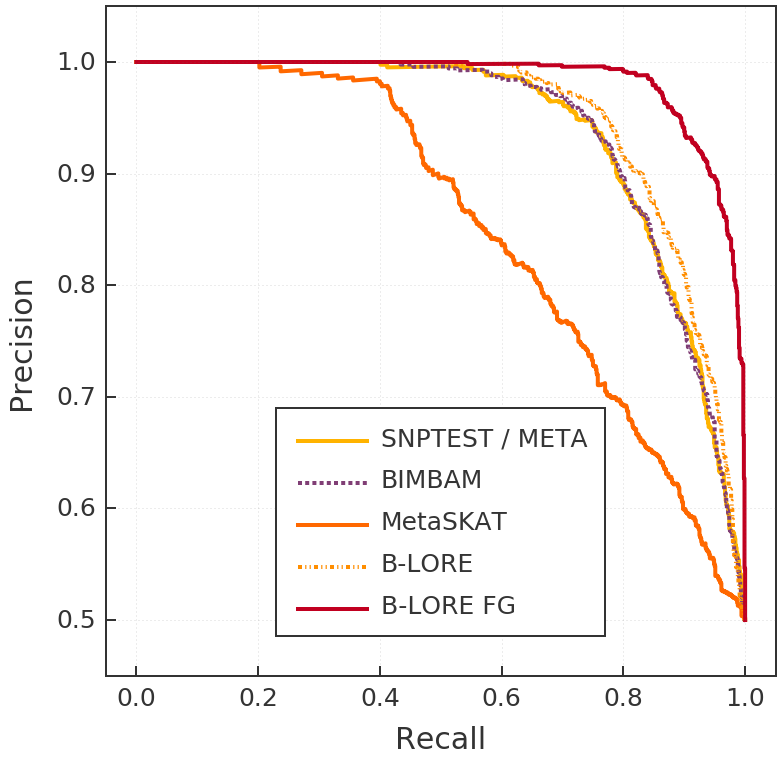

In [29]:
def plot_benchmark(ax, data, color, myls, legend):
    xvals = data[0]
    yvals = data[1]
    color = color
    coef = 4
    _dash = 1
    _dot = 0.3
    _dashspace = 0.8
    _dotspace = 0.5
    if myls == 'solid':
        mydash = []
    elif myls == 'dashed':
        mydash = [_dash, _dashspace]
    elif myls == 'dotted':
        mydash = [_dot, _dotspace]
    elif myls == 'dashdot':
        mydash = [_dash, _dashspace, _dot, _dashspace]
    elif myls == 'dashdotdot':
        mydash = [_dash, _dashspace, _dot, _dashspace, _dot, _dashspace]
    elif myls == 'dashdashdot':
        mydash = [_dash, _dashspace, _dashspace, _dashspace, _dot, _dashspace]
    mydash = [x * coef for x in mydash]
    mlabel_roc_py = legend
    ax.plot(xvals, yvals, color=color, dashes=mydash, lw=4, label=mlabel_roc_py)
    return

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray

    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

marker_list = ['8', '>', 'd', '<', '*', 'p', '^', 's', 'h', 'v', 'D', r'$\clubsuit$']

bordercolor = '#2B2B2B'
bordercolor = '#333333'
borderwidth = 2
colors = kelly_colors_hex
figsize = (12,12)
axis_font_size = 30
label_font_size = 25
legend_font_size = 25

fig = plt.figure(figsize = figsize)
ax1 = fig.add_subplot(111)

#xx = [0, 200]
#yy = [0,1]
#ax1.plot(xx, yy, '--', color='dimgrey', lw=2)

plot_benchmark(ax1, xysnptest, colors[0], 'solid', 'SNPTEST / META')
plot_benchmark(ax1, xybimbam, colors[1], 'dashed', 'BIMBAM')
plot_benchmark(ax1, xymetaskat, colors[2], 'solid', 'MetaSKAT')
#plot_benchmark(ax1, xymetacca_10, colors[7], 'dashdot', 'metaCCA')
#plot_benchmark(ax1, xycaviarbf_c1, colors[9], 'dashdashdot', 'CAVIARBF / 1')
#plot_benchmark(ax1, xycaviarbf_c2, colors[9], 'solid', 'CAVIARBF / 2')
plot_benchmark(ax1, xyblore, colors[12], 'dashdotdot', 'B-LORE')
plot_benchmark(ax1, xyblore_feat, colors[4], 'solid', 'B-LORE FG')

#plot_benchmark(ax1, xycaviarbf_c2, colors[9], 'dotted', 'CAVIARBF / 2')
#plot_benchmark(ax1, xypaintor_comb, colors[4], 'dotted', 'PAINTOR')
#plot_benchmark(ax1, xypaintor_indv, colors[5], 'dotted', 'PAINTOR-indv')


#plot_benchmark(ax1, xymetacca_all, colors[6], 'solid', 'metaCCA / all SNPs')
#plot_benchmark(ax1, xymetacca_30, colors[9], 'dashdot', 'metaCCA / 30 SNPs')


#mxlabel = r'Proportion of causal loci which are predicted'
mxlabel = r'Recall'
#mylabel = r'Proportion of predicted loci which are causal'
mylabel = r'Precision'
ax1.set_xlabel(mxlabel, {'size': axis_font_size, 'color': bordercolor}, labelpad = 15)
ax1.set_ylabel(mylabel, {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)

ax1.set_xlim(-0.05, 1.05)
#ax1.set_xlim(0, 200)
ax1.set_ylim(0.45, 1.05)
#ax1.set_ylim(-0.05, 1.05)

legend = ax1.legend(loc='lower center', 
                    bbox_to_anchor=(0.5, 0.05),
                    handlelength = 6.4,
                    frameon = True,
                    borderpad = 1.5,
                    labelspacing = 1.5,
                    ncol = 1)
lframe = legend.get_frame()
lframe.set_edgecolor(bordercolor)
lframe.set_linewidth(borderwidth)
#lframe.set_facecolor('snow')

for fonts in ([legend.get_title()] + legend.texts):
    fonts.set_fontsize(legend_font_size)
    fonts.set_color(bordercolor)
ax1.tick_params(axis='both', which = 'major', 
               length = 10, width = borderwidth, pad=10,
               labelsize = label_font_size,
               color = bordercolor,
               labelcolor = bordercolor,
               bottom = True, top = False, left = True, right = False
              )
for side, border in ax1.spines.items():
    border.set_linewidth(borderwidth)
    border.set_color(bordercolor)
ax1.grid(color='dimgray', lw=0.5, alpha=0.5)

plt.tight_layout
#plt.savefig('simu_locus_precision_recall_nold.pdf', bbox_inches='tight')
#plt.savefig('simu_locus_precision_recall_withld.pdf', bbox_inches='tight')
#plt.savefig('metacca_simulation_preselected_snps.pdf', bbox_inches='tight')
plt.show()

In [ ]:
xymetacca_10[1][2] = 0.8

In [ ]:
def snptestjitter(x):
    xnew = x
    if x == 6:
        xnew -= abs(np.random.normal(0, 1))
    return xnew

def bammgwasjitter(x):
    xnew = x
    if x > 0.9999:
        xnew -= abs(np.random.normal(0, 0.005))
    elif x < 0.0001:
        xnew += abs(np.random.normal(0, 0.005))
    return xnew

log10p_false = [snptestjitter(min(x.stat, 6)) for x in snptest if x.causality == 0]
log10p_true = [snptestjitter(min(x.stat, 6)) for x in snptest if x.causality == 1]

bvslrp_false = [bammgwasjitter(x.stat) for x in bammgwas if x.causality == 0]
bvslrp_true = [bammgwasjitter(x.stat) for x in bammgwas if x.causality == 1]
#bvslrp_false = [bammgwasjitter(x.stat) for x in bammgwas_feat if x.causality == 0]
#bvslrp_true = [bammgwasjitter(x.stat) for x in bammgwas_feat if x.causality == 1]
#bvslrp_false = [bammgwasjitter(x.stat) for x in paintor_comb if x.causality == 0]
#bvslrp_true = [bammgwasjitter(x.stat) for x in paintor_comb if x.causality == 1]

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray

    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

bordercolor = '#2B2B2B'
bordercolor = '#333333'
borderwidth = 2
colors = kelly_colors_hex
figsize = (12, 12)
axis_font_size = 30
label_font_size = 25
legend_font_size = 25

fig = plt.figure(figsize = figsize)
ax = fig.add_subplot(111)

#ax.fill_between([1.55, 7.0], -0.50, 15.3, facecolor='moccasin', edgecolor='None')
#x = np.linspace(1.0, 7.0, 200)
#y1 = 10.0
#y2 = 0#np.linspace(0, y1, 200)
#ax.fill_between(x, y1, y2, facecolor='moccasin', edgecolor='None')

mlabel = "Causal"
ax.scatter(log10p_true, bvslrp_true, color=colors[4], edgecolor=colors[15], s = 300, alpha = 0.6, label = mlabel)

mlabel = "Non-causal"
ax.scatter(log10p_false, bvslrp_false, color=colors[3], edgecolor=colors[9], s = 300, alpha = 0.7, label = mlabel)

mylabel = r'B-LORE $[{\mathrm{Pr}}_{\mathrm{causal}}]$'
mxlabel = r'SNPTEST / META $\left[ -\log_{10}(p) \right]$'
ax.set_xlabel(mxlabel, {'size': axis_font_size, 'color': bordercolor}, labelpad = 15)
ax.set_ylabel(mylabel, {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
#ax.set_yticks([0, 1, 2, 3, 4, 7])

ax.set_ylim(-0.02, 1.02)
ax.set_xlim(-0.1, 6.1)

legendtitle = 'Loci'
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                   scatterpoints = 1,
                   frameon = True, borderpad = 1.5, labelspacing = 1.5
                   #title = legendtitle
                  )
#legend = ax.legend(loc='lower right', bbox_to_anchor=(0.98, 0.1),
#                   scatterpoints = 1,
#                   frameon = True, borderpad = 1.5, labelspacing = 1.5
#                   #title = legendtitle
#                  )
lframe = legend.get_frame()
lframe.set_edgecolor(bordercolor)
lframe.set_linewidth(borderwidth)

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

ax.tick_params(axis='both', which = 'major', 
               length = 10, width = borderwidth, pad=10,
               labelsize = label_font_size,
               color = bordercolor,
               labelcolor = bordercolor,
               bottom = True, top = False, left = True, right = False
              )
for side, border in ax.spines.items():
    border.set_linewidth(borderwidth)
    border.set_color(bordercolor)
for fonts in ([legend.get_title()] + legend.texts):
    fonts.set_fontsize(legend_font_size)
    fonts.set_color(bordercolor)
    

#tl = ax.get_yticks().tolist()
#tl[0] = '0'
#tl[1] = '0.9'
#tl[2] = '0.99'
#tl[3] = '0.999'
#tl[4] = '0.9999'
#tl[5] = '1.0'

#ax.set_yticklabels(tl)

tl = ax.get_xticks().tolist()
tl[6] = '>6'
ax.set_xticklabels(tl)

#d = .015 # how big to make the diagonal lines in axes coordinates
#p1 = 0.91
#p2 = 0.93
## arguments to pass plot, just so we don't keep repeating them
#kwargs = dict(transform=ax.transAxes, color=bordercolor, clip_on=False, linewidth=borderwidth)
#ax.plot((-d,+d), (p1-d,p1+d), **kwargs)
#ax.plot((-d,+d), (p2-d,p2+d), **kwargs)
#ax.plot((1-d,1+d), (p1-d,p1+d), **kwargs)
#ax.plot((1-d,1+d), (p2-d,p2+d), **kwargs)

ax.grid(color='dimgray', lw=0.5, alpha=0.5)

plt.tight_layout()
#plt.savefig('simu_locus_scatter_nold_nofeat.pdf', bbox_inches='tight')
#plt.savefig('simu_locus_scatter_nold_nofeat.png', bbox_inches='tight')
#plt.savefig('simu_locus_scatter_nold_feat.pdf', bbox_inches='tight')
#plt.savefig('simu_locus_scatter_nold_feat.png', bbox_inches='tight')
#plt.savefig('simu_locus_scatter_withld.pdf', bbox_inches='tight')
#plt.savefig('simu_locus_scatter_withld.png', bbox_inches='tight')
plt.show()